In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.duplicated().sum()


np.int64(1081)

In [ ]:
df.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (283726, 31)


In [ ]:
df.duplicated().sum()

np.int64(0)

We split the data into the train and test, Now we will work on the Train dataset.

In [ ]:

'''
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Downsample to 100,000 rows while keeping class ratio
X_reduced, _, y_reduced, _ = train_test_split(
    X, y,
    train_size=100000,
    stratify=y,
    random_state=42
)

# Combine back into one DataFrame
reduced_df = X_reduced.copy()
reduced_df['Class'] = y_reduced
'''


In [ ]:
reduced_df.shape

(100000, 31)

In [ ]:
reduced_df['Class'].value_counts()

,count
Class,
0,99833
1,167


In [ ]:
X = df.drop("Class",axis=1)
Y = df['Class']

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=72)

In [ ]:
y_train.value_counts()

,count
Class,
0,226596
1,384


In [ ]:
train_set = np.concatenate([x_train.values, y_train.values.reshape(-1, 1)], axis=1)

In [ ]:
train_set = pd.DataFrame(train_set)

In [ ]:
train_set.columns = x_train.columns.tolist() + ['Class']

In [ ]:
train_set['Class'].unique()

array([0., 1.])

Checking the missing values in the dataset

In [ ]:
train_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,166571.0,-0.263581,0.539459,1.151335,0.239111,0.081514,0.406554,0.374843,0.164471,0.186264,...,-0.404868,-0.954422,0.133964,-0.416226,-1.035955,-0.095476,0.080044,0.171671,29.24,0.0
1,76568.0,-0.622597,-0.129574,1.656816,0.097608,-2.107890,0.819533,1.836955,-0.469041,0.513302,...,-0.146895,0.103710,0.306274,0.508722,-0.771444,0.892513,-0.006401,-0.142465,406.23,0.0
2,926.0,0.829998,-0.611411,1.035351,1.615569,-0.283094,2.146994,-0.830778,0.824311,1.478535,...,-0.309388,-0.500548,0.154324,-0.996832,0.108640,-0.411158,0.125290,0.023370,64.99,0.0
3,167663.0,1.727682,-0.471870,-2.360559,1.105118,0.937635,0.019431,0.727822,-0.208714,0.076996,...,0.117661,0.102664,-0.341391,-1.441763,0.530395,-0.439758,-0.057657,-0.055072,192.22,0.0
4,112061.0,1.996616,-0.231576,-1.670163,0.675869,-0.023765,-1.408983,0.450488,-0.360810,0.647546,...,-0.024352,-0.043764,0.056334,0.046036,0.134475,0.379044,-0.103779,-0.070678,47.48,0.0


There are no missing value in the training dataset, but if there was missing value, we could have use the

df = df.dropna()

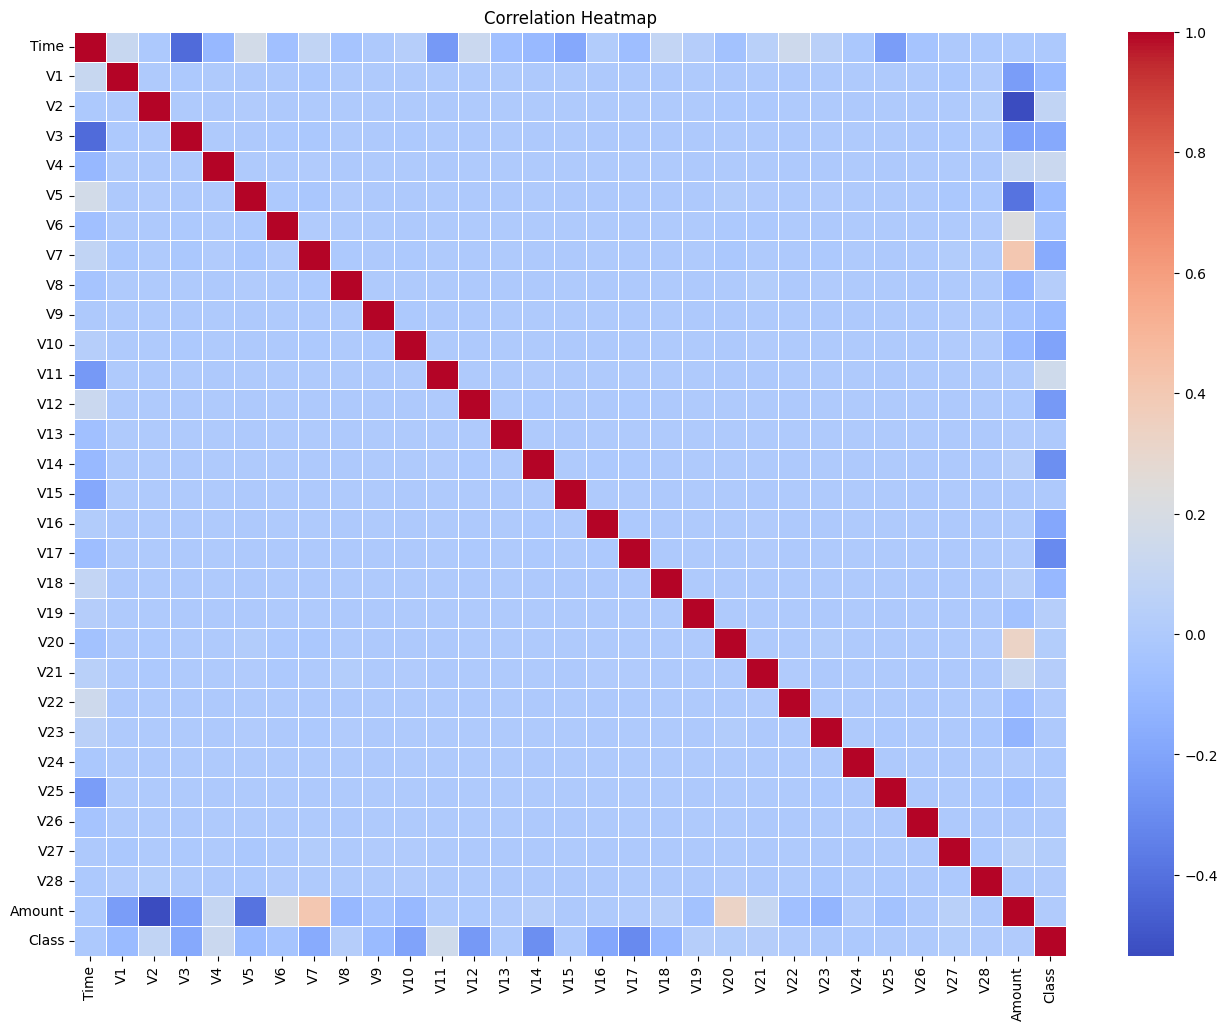

In [ ]:
cor = train_set.corr()
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(cor, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

Checking the missing values in the dataset

In [ ]:
train_set.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There are no missing value in the training dataset, but if there was missing value, we could have use the

df = df.dropna()

The dataset we are using is already scaled and pca , but only two columns are not scaled [['Time','Amount']].

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only scale Time and Amount
train_set[['Time', 'Amount']] = scaler.fit_transform(train_set[['Time', 'Amount']])

In [ ]:
import pickle

with open("scaler1.pkl", "wb") as f:
    pickle.dump(scaler, f)


Now we will check the whether the dataset of training is imbalance or not? We must only do the checking and handling of the imbalanceness once we have split the data.

else there will be the problem of data leakage while handling

Class
0.0    0.998308
1.0    0.001692
Name: proportion, dtype: float64
Class
0.0    226596
1.0       384
Name: count, dtype: int64


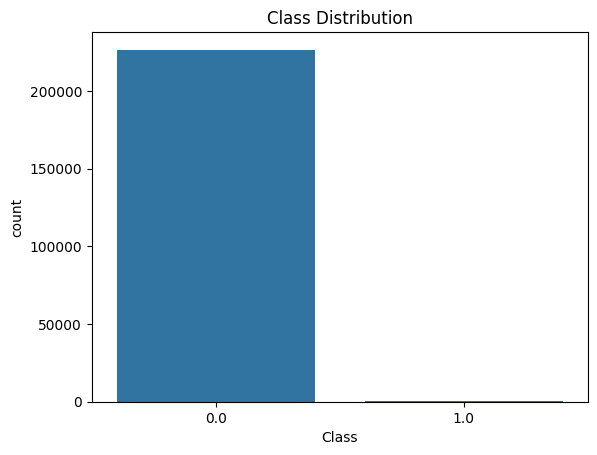

In [ ]:
# Assuming your target column is 'Class'
print(train_set['Class'].value_counts(normalize=True))  # Gives proportion
print(train_set['Class'].value_counts())                # Gives actual counts

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train_set['Class'])
plt.title("Class Distribution")
plt.show()

In [ ]:
x_train = train_set.drop("Class",axis=1)
y_train = train_set['Class']

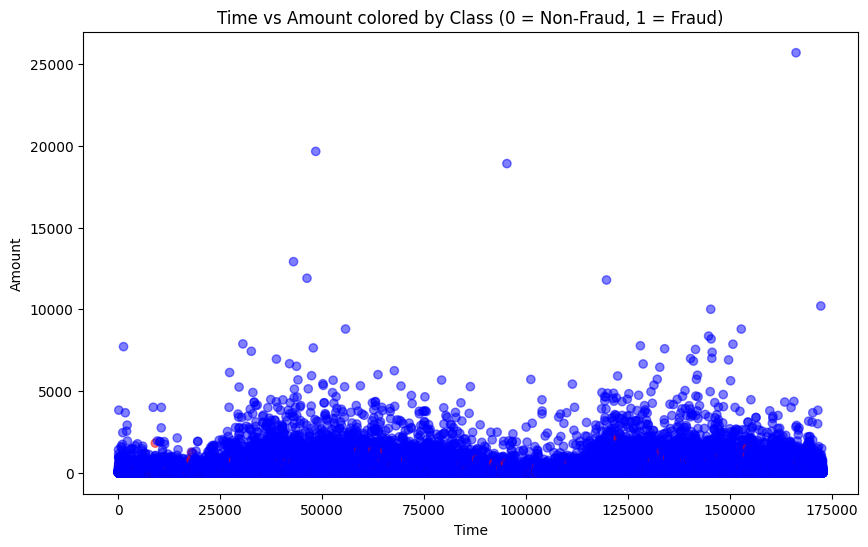

In [ ]:
# Plot
plt.figure(figsize=(10,6))
colors = {0:'blue', 1:'red'}
plt.scatter(df['Time'], df['Amount'], c=df['Class'].map(colors), alpha=0.5, label='Transactions')
plt.title("Time vs Amount colored by Class (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [ ]:


# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Check new class distribution
print(y_train_balanced.value_counts())

Class
0.0    226596
1.0    226596
Name: count, dtype: int64


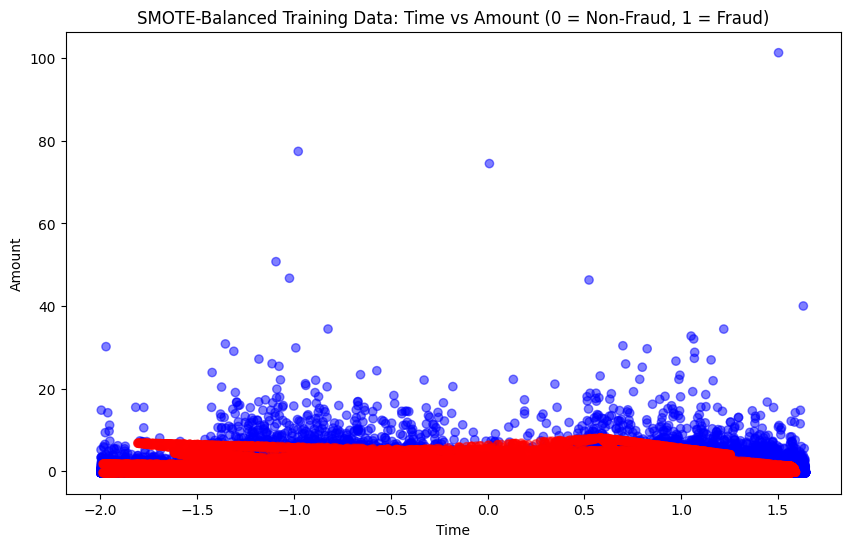

In [ ]:
smote_df = pd.DataFrame(X_train_balanced, columns=x_train.columns)
smote_df['Class'] = y_train_balanced

plt.figure(figsize=(10,6))
colors = {0: 'blue', 1: 'red'}
plt.scatter(smote_df['Time'], smote_df['Amount'], c=smote_df['Class'].map(colors), alpha=0.5)
plt.title("SMOTE-Balanced Training Data: Time vs Amount (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

Always do the PCA after doing the train/test split and feature engineering of the dataset else there will be chance of data leakage



In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 20.5 MB/s eta 0:00:00


In [ ]:

import pickle
import json

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:

# Train final model on full train set
final_rf = RandomForestClassifier()
final_rf.fit(x_train, y_train)

y_pred = final_rf.predict(x_train)
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))


# Evaluate
y_pred = final_rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    226596
         1.0       1.00      1.00      1.00       384

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980

[[226596      0]
 [     0    384]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.93      0.84      0.88        89

    accuracy                           1.00     56746
   macro avg       0.96      0.92      0.94     56746
weighted avg       1.00      1.00      1.00     56746

[[56651     6]
 [   14    75]]


In [ ]:
params_rf = final_rf.get_params()

fine tuned the hyperparameter of the random forest to get better result

In [ ]:
params_rf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params_rf['max_depth'] = 20
params_rf['min_samples_leaf'] = 5
params_rf['min_samples_split'] = 5
params_rf['n_estimators'] = 150


In [ ]:
final_rf = RandomForestClassifier(**params_rf)
final_rf.fit(x_train, y_train)

y_pred = final_rf.predict(x_train)
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))


# Evaluate
y_pred = final_rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    226596
         1.0       0.97      0.80      0.88       384

    accuracy                           1.00    226980
   macro avg       0.98      0.90      0.94    226980
weighted avg       1.00      1.00      1.00    226980

[[226585     11]
 [    75    309]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.90      0.82      0.86        89

    accuracy                           1.00     56746
   macro avg       0.95      0.91      0.93     56746
weighted avg       1.00      1.00      1.00     56746

[[56649     8]
 [   16    73]]


XGBoost

In [ ]:

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train final model
final_xgb = XGBClassifier()
final_xgb.fit(x_train, y_train)

y_pred = final_xgb.predict(x_train)

# Evaluate
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))


# Predict on test data
y_pred = final_xgb.predict(x_test)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    226596
         1.0       0.99      1.00      0.99       384

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980

[[226593      3]
 [     1    383]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.92      0.74      0.82        89

    accuracy                           1.00     56746
   macro avg       0.96      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

[[56651     6]
 [   23    66]]


Fine tunnig the parameters of the XGB, using Optuna

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def objective_xgb(trial):

    params = {
    'n_estimators': trial.suggest_int('n_estimators', 100, 500),
    'max_depth': trial.suggest_int('max_depth', 3, 12),
    'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
    'subsample': trial.suggest_float('subsample', 0.6, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
    'gamma': trial.suggest_float('gamma', 0, 10),
    'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
    'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
    'scale_pos_weight': 1,  # dynamically calculated from data
    'random_state': 42,

    'eval_metric': 'aucpr'
}

    model = XGBClassifier(**params)

    score = cross_val_score(model, x_train, y_train, cv=5, scoring='f1').mean()
    return score

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50)

best_params_xgb = study_xgb.best_params
best_params_xgb["random_state"] = 42
best_params_xgb["scale_pos_weight"] = 1
best_params_xgb["use_label_encoder"] = False
best_params_xgb["eval_metric"] = "logloss"


[I 2025-07-31 14:10:26,586] A new study created in memory with name: no-name-60145c7b-1b83-41e7-9b97-90817ae343c8
[I 2025-07-31 14:10:35,713] Trial 0 finished with value: 0.7603754358499965 and parameters: {'n_estimators': 170, 'max_depth': 3, 'learning_rate': 0.024529199543297124, 'subsample': 0.7250087670391515, 'colsample_bytree': 0.8959890579489382, 'min_child_weight': 4, 'gamma': 1.5814939564678865, 'reg_alpha': 1.3458023011397957, 'reg_lambda': 6.711652891223377}. Best is trial 0 with value: 0.7603754358499965.
[I 2025-07-31 14:10:40,895] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 142, 'max_depth': 8, 'learning_rate': 0.011382981939074265, 'subsample': 0.738156205747391, 'colsample_bytree': 0.7406704128884553, 'min_child_weight': 7, 'gamma': 3.710500615666583, 'reg_alpha': 1.6833424699620392, 'reg_lambda': 3.7750762508742017}. Best is trial 0 with value: 0.7603754358499965.
[I 2025-07-31 14:10:54,677] Trial 2 finished with value: 0.757546485260771 and param

In [ ]:
best_params_xgb['n_estimators'] = 299
best_params_xgb['max_depth'] = 3
best_params_xgb['learning_rate']=0.049999
best_params_xgb['min_child_weight'] = 5

In [ ]:
best_params_xgb = {'n_estimators': 260, 'max_depth': 8, 'learning_rate': 0.0657982276406484, 'subsample': 0.7845218849947364, 'colsample_bytree': 0.7472485284855487, 'min_child_weight': 3, 'gamma': 0.679654571650455, 'reg_alpha': 0.9420166716461378, 'reg_lambda': 3.593357343307511}

In [ ]:
best_params_xgb

{'n_estimators': 299,
 'max_depth': 3,
 'learning_rate': 0.049999,
 'subsample': 0.7845218849947364,
 'colsample_bytree': 0.7472485284855487,
 'min_child_weight': 5,
 'gamma': 0.679654571650455,
 'reg_alpha': 0.9420166716461378,
 'reg_lambda': 3.593357343307511}

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train final model
final_xgb = XGBClassifier(**best_params_xgb)
final_xgb.fit(x_train, y_train)

y_pred = final_xgb.predict(x_train)

# Evaluate
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))


# Predict on test data
y_pred = final_xgb.predict(x_test)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    226596
         1.0       0.97      0.82      0.89       384

    accuracy                           1.00    226980
   macro avg       0.98      0.91      0.94    226980
weighted avg       1.00      1.00      1.00    226980

[[226586     10]
 [    69    315]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.86      0.85      0.86        89

    accuracy                           1.00     56746
   macro avg       0.93      0.93      0.93     56746
weighted avg       1.00      1.00      1.00     56746

[[56645    12]
 [   13    76]]
